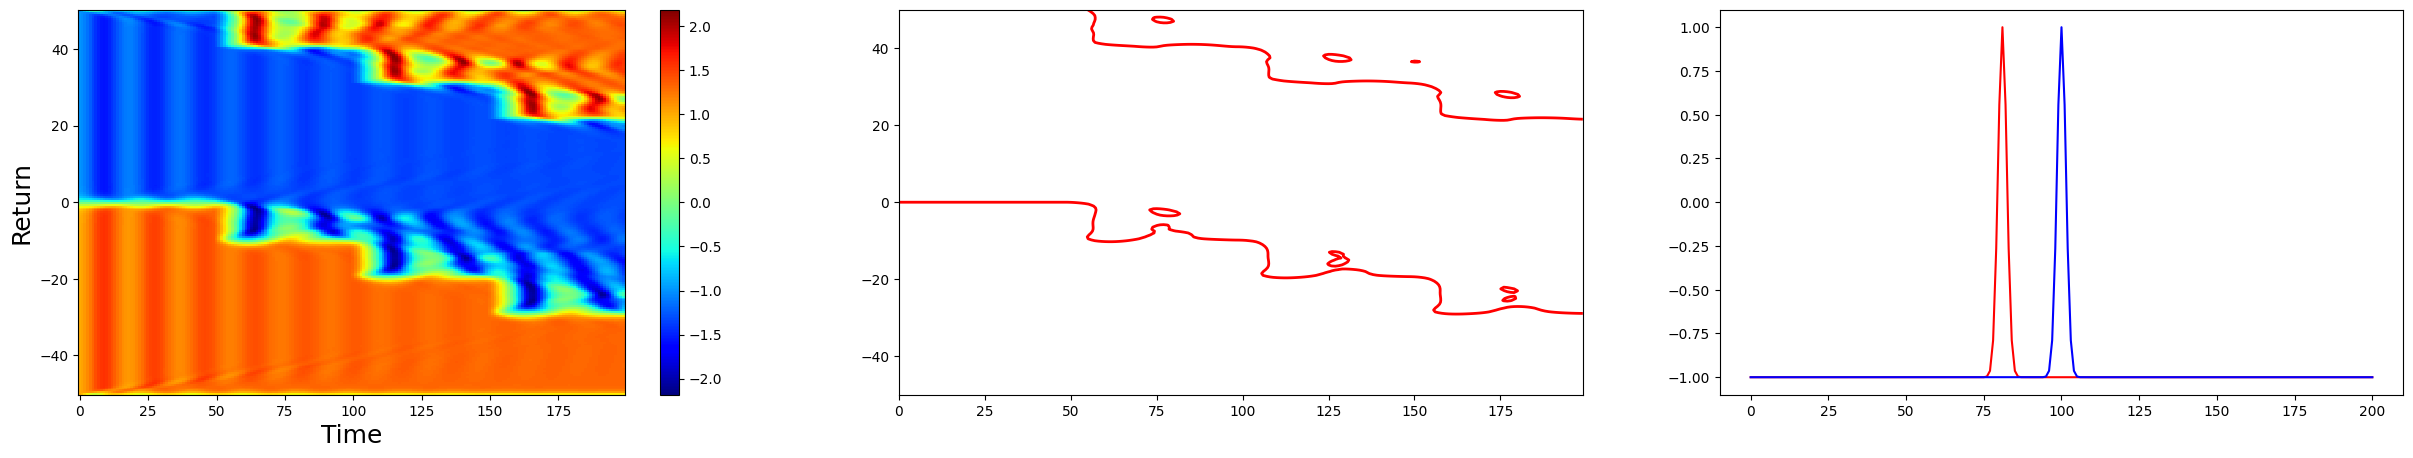

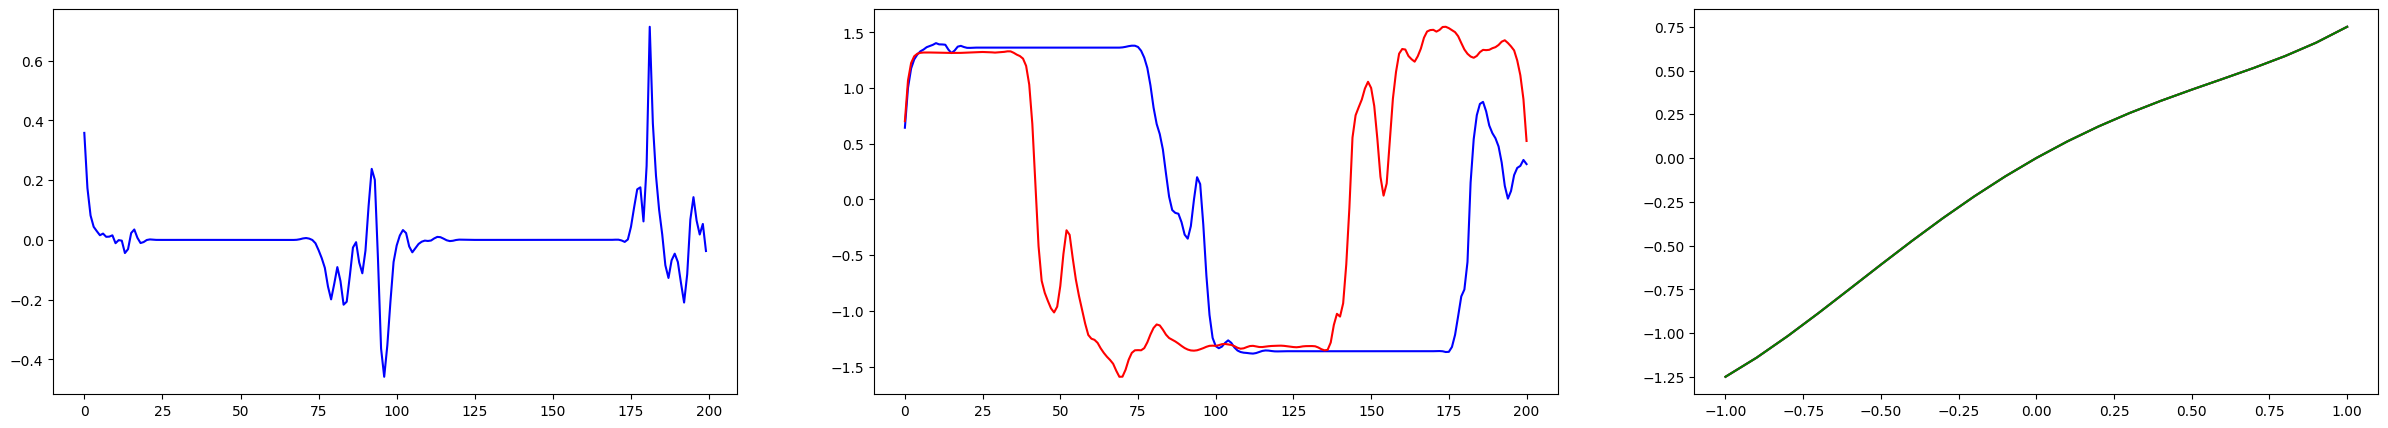

In [ ]:
# THIS IS A WORKING VERSION
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.linalg as la
import pylab as pylab

dt = 0.05 #@param {type: "number"}
Nt = 200 #@param {type: "number"}
Nx = 201 #@param {type: "number"}
x = np.linspace(-50, 50, Nx); dx = x[1] - x[0];
# a0 = -1#@param {type: "number"}
b = 1#@param {type: "number"}
c = 1#@param {type: "number"}
w = np.sqrt(2*c/b);
r = 1#@param {type: "number"}
d = 19#@param {type: "number"}
freq = 50#@param {type: "number"}
tau1 = 0.3 #@param {type: "number"}
tau2 = 0.2 #@param {type: "number"}
########################### Gaussian profile
p = -1 * np.tanh( x/w )
# print('sum prob = ', np.sum(p**2) * dx)

q = np.zeros( Nx )
P = np.zeros( (Nx, Nt) ); P[:, 0] = p
Q = np.zeros( (Nx, Nt) ); Q[:, 0] = q

def GaussM(N):
  d0 = -2 * np.ones(N)
  d1 = 1 * np.ones(N-1)
  M = np.diag(d0, 0) + np.diag(d1, 1) + np.diag(np.conj(d1), -1)
  return M

def DriftM(N):
  d1 = 1 * np.ones(N-1)
  M = -np.diag(d1, 1) + np.diag(np.conj(d1), -1)
  return M

a1 = 1*np.tanh( x/r )
a2 = b -2 + 2*np.exp( -(x/r)**2 ); a2_ini = a2;
def ProbDyn(p, q, Nt, dt, tau1, tau2):
  global a2, a1
  TT = np.arange(1, Nt)
  for t in TT:
    if t % freq == 0:
      a1 = np.roll(a1, -d)
      a2 = np.roll(a2, -d)
      a2 = np.maximum(a2, -1)
    else:
      pass
    M = GaussM(Nx)
    MM = DriftM(Nx)
    q = q - (a1 + a2*p + 0*p**2 + b*p**3 - c*M.dot(p)/(dx**2) )*(dt/tau1)
    q = q * np.exp(-tau2/tau1 * dt)
    p = p + q*(dt/tau1)
    P[:, t] = p
  return P

P = ProbDyn(p, q, Nt, dt, tau1, tau2)
T = np.arange(0, Nt) * 1
fig = plt.figure(figsize = (30, 5))
plt.subplot(1, 3, 1)
pylab.pcolor(T, x, P, cmap='jet')
pylab.colorbar()
plt.xlabel('Time', fontsize=18)
plt.ylabel('Return', fontsize=18)
plt.subplot(1, 3, 2)
plt.contour(T, x, P, levels=[0], colors='red', linewidths=2)
plt.subplot(1, 3, 3)
plt.plot(np.roll(a2_ini, -d), color='red'); plt.plot(a2_ini, color='blue'); #plt.plot(a2, color='green');
fig = plt.figure(figsize = (30, 5))
plt.subplot(1, 3, 1)
plt.plot(np.diff(P[:,80]), color='blue');
plt.subplot(1, 3, 2)
plt.plot(P[:,80], color='blue'); plt.plot(P[:,-1], color='red')
plt.subplot(1, 3, 3)
M = GaussM(Nx); MM = DriftM(Nx); pp = np.arange(-1, 1.1, 0.1)
n0 = 100; F0 = a1[n0]*pp + (1/2)*a2[n0]*pp**2 + (1/3)*0*pp**3 + (1/4)*b*pp**4
plt.plot(pp, F0, 'b');
n1 = 140; F1 = a1[n1]*pp + (1/2)*a2[n1]*pp**2 + (1/3)*0*pp**3 + (1/4)*b*pp**4
plt.plot(pp, F1, 'r');
n2 = 70; F2 = a1[n2]*pp + (1/2)*a2[n2]*pp**2 + (1/3)*0*pp**3 + (1/4)*b*pp**4
plt.plot(pp, F2, 'g');